In [29]:
#code to analyse the bounding boxes


In [53]:
import csv
import numpy as np
import matplotlib.pyplot as plt

In [54]:
file = open('outputs/data2.csv')
reader = csv.reader(file)

In [55]:
header = next(reader)
header

['track_id', 'area', 'class', 'Frame Number', 'Hits', 'Age']

In [56]:
data = []
for row in reader:
    #print(row)
    data.append(row)


    

In [57]:
len(data)

43186

In [58]:
data[1]

['4', '1398.4117438467676', 'car', '20', '3', '4']

In [59]:
#id : no of hits,max_size,average_size,min_size,"type"
database = {}
max_hits = 0
for i in range(len(data)):
    track_id = data[i][0]
    if track_id not in database.keys():
        database[track_id] = [int(data[i][4]),float(data[i][1]),float(data[i][1]),float(data[i][1]),data[i][2]]
        max_hits = max(max_hits,int(data[i][5]))
    else:
        val = database[track_id]
        hits = val[0] + 1
        max_hits = max(max_hits,hits)
        avg = val[2]*(val[0]) + float(data[i][1])
        avg = avg / hits
        mini = min(val[3],float(data[i][1]))
        maxi = max(val[1],float(data[i][1]))
        new_val = [hits,maxi,avg,mini,val[4]]
        database[track_id] = new_val
        

In [60]:
print(database)

{'4': [7, 2011.457053323203, 1517.553211312865, 1269.5314753710252, 'car'], '5': [5, 1347.7363375226091, 1273.0491538146618, 1146.102253937086, 'car'], '13': [4, 1647.122420220555, 1618.7055698045804, 1609.2332863325887, 'car'], '15': [93, 312765.32034027524, 69572.6964587879, 5264.189005984851, 'truck'], '21': [4, 684.8448705571541, 679.3023694348616, 677.454869060764, 'car'], '24': [8, 1165.8997838892496, 1085.1824993261332, 1046.3010796773622, 'car'], '25': [5, 958.5647181128995, 935.3201993267792, 898.8224673452331, 'car'], '26': [287, 388943.3321995284, 68479.19641830983, 586.1069517814143, 'car'], '29': [7, 8688.769964373829, 6440.24609257702, 5144.822054219411, 'car'], '31': [194, 195786.6420939994, 29473.04116525791, 496.2241101391207, 'car'], '38': [93, 19452.08347415132, 5498.939222067577, 464.74551546415057, 'truck'], '40': [124, 3069.0632313562774, 1424.6515363633462, 444.5628206159445, 'car'], '41': [5, 1753.0094349628016, 1120.3541714709734, 786.1010047861271, 'car'], '42

In [61]:
print(max_hits)

1461


In [62]:
def count_objects(object_class):
    cnt = 0
    for key in database.keys():
        #print(database[key])
        if(database[key][4] == object_class):
            cnt += 1
    print("No of objects of type {0} is {1}".format(object_class,cnt))

In [63]:
count_objects('car')

No of objects of type car is 577


In [64]:
count_objects('truck')

No of objects of type truck is 185


In [65]:
count_objects('motorbike')

No of objects of type motorbike is 23


In [66]:
count_objects('bus')

No of objects of type bus is 13


In [67]:
X_Hits = [5*i for i in range(300)]
Y_H = [0 for i in range(300)] 
plus = 0
cnt = 0
vals = []
for ids in database.keys():
    
    cont = database[ids][0]
    index = cont / 5
    index = int(index)
    Y_H[index] += 1
    plus += cont
    cnt += 1
    vals.append(cont)
        
        
avg = plus/cnt
        
        
    

In [68]:
import statistics
statistics.median(vals)

25.0

In [69]:
print(avg)
print(Y_H)

56.11779448621554
[58, 175, 73, 48, 42, 28, 23, 26, 18, 24, 20, 22, 15, 11, 12, 10, 17, 17, 19, 15, 4, 12, 8, 7, 8, 6, 2, 6, 1, 5, 3, 4, 5, 2, 1, 1, 4, 3, 3, 2, 1, 3, 1, 1, 1, 2, 1, 1, 3, 0, 2, 2, 1, 1, 1, 1, 0, 2, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]


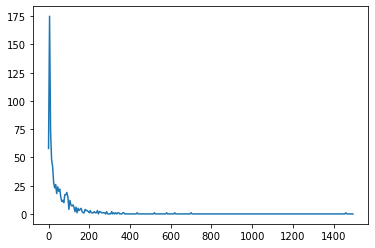

In [70]:
plt.plot(X_Hits,Y_H)
plt.show()

In [71]:
X = [i*1500 for i in range(1,100)]
Y = [0 for i in range(1,100)]
for ids in database.keys():
    count = database[ids][0]
    #print(count)
    #print(database[ids])
    #print(database[ids][4])
    if(database[ids][4] == 'car'):
        #print(database[ids][4])
        avg = database[ids][2]
        print(avg)
        index = int(avg // 1500)
        #print(index)
        print(index)
        Y[int(index)] += 1

        
        
        

1517.553211312865
1
1273.0491538146618
0
1618.7055698045804
1
679.3023694348616
0
1085.1824993261332
0
935.3201993267792
0
68479.19641830983
45
6440.24609257702
4
29473.04116525791
19
1424.6515363633462
0
1120.3541714709734
0
30424.81981833773
20
26116.567667909912
17
2550.840000851649
1
570.5288288091139
0
20298.82922758929
13
741.673966739801
0
1014.4682396300934
0
7994.589605220343
5
71629.49604949685
47
20462.603965418188
13
986.2821081888922
0
366.1998372281491
0
979.0562101723197
0
1095.7467262678008
0
1228.9362638518855
0
1280.214751302936
0
9010.485865548973
6
13182.397372752008
8
9977.484857619585
6
4179.124482752217
2
934.9362360728852
0
704.8055211695059
0
1912.1201932424958
1
23846.56614925556
15
4949.201908441913
3
5457.016243264909
3
2604.6098585987625
1
5894.132295528723
3
7894.595268890872
5
13391.947236564869
8
2342.8053159488627
1
3566.6879906756685
2
685.5613205788735
0
2675.742163607638
1
35712.549921063495
23
5439.5201973729845
3
7713.199122229971
5
12271.139141096

In [72]:
print(X)
print(Y)

[1500, 3000, 4500, 6000, 7500, 9000, 10500, 12000, 13500, 15000, 16500, 18000, 19500, 21000, 22500, 24000, 25500, 27000, 28500, 30000, 31500, 33000, 34500, 36000, 37500, 39000, 40500, 42000, 43500, 45000, 46500, 48000, 49500, 51000, 52500, 54000, 55500, 57000, 58500, 60000, 61500, 63000, 64500, 66000, 67500, 69000, 70500, 72000, 73500, 75000, 76500, 78000, 79500, 81000, 82500, 84000, 85500, 87000, 88500, 90000, 91500, 93000, 94500, 96000, 97500, 99000, 100500, 102000, 103500, 105000, 106500, 108000, 109500, 111000, 112500, 114000, 115500, 117000, 118500, 120000, 121500, 123000, 124500, 126000, 127500, 129000, 130500, 132000, 133500, 135000, 136500, 138000, 139500, 141000, 142500, 144000, 145500, 147000, 148500]
[198, 87, 45, 42, 15, 32, 16, 15, 13, 14, 10, 12, 7, 11, 5, 5, 2, 6, 1, 3, 2, 3, 4, 5, 0, 0, 1, 2, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 3, 0, 2, 2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 

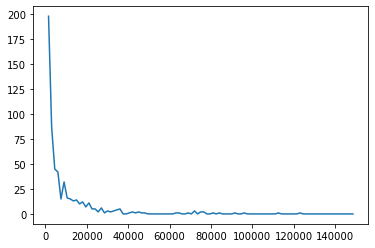

In [73]:
plt.plot(X,Y)
plt.show()


In [52]:
print(sum(Y))

428
